In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [7]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [9]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [11]:
data.dropna()

,0,1,2,3


In [12]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [15]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,0.762658,NaN,NaN
1,2.026170,NaN,NaN
2,-0.001165,NaN,0.056805
3,1.170955,NaN,0.201145
4,-0.463453,-0.208990,0.126049
5,0.518409,0.951995,0.363427
6,1.453185,-0.262438,0.233580


In [16]:
df.fillna(0)

,0,1,2
0,0.762658,0.000000,0.000000
1,2.026170,0.000000,0.000000
2,-0.001165,0.000000,0.056805
3,1.170955,0.000000,0.201145
4,-0.463453,-0.208990,0.126049
5,0.518409,0.951995,0.363427
6,1.453185,-0.262438,0.233580


In [17]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.762658,0.500000,0.000000
1,2.026170,0.500000,0.000000
2,-0.001165,0.500000,0.056805
3,1.170955,0.500000,0.201145
4,-0.463453,-0.208990,0.126049
5,0.518409,0.951995,0.363427
6,1.453185,-0.262438,0.233580


In [18]:
df.fillna(method="bfill")

,0,1,2
0,0.762658,-0.208990,0.056805
1,2.026170,-0.208990,0.056805
2,-0.001165,-0.208990,0.056805
3,1.170955,-0.208990,0.201145
4,-0.463453,-0.208990,0.126049
5,0.518409,0.951995,0.363427
6,1.453185,-0.262438,0.233580


In [19]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,0.762658,NaN,0.056805
1,2.026170,NaN,0.056805
2,-0.001165,-0.208990,0.056805
3,1.170955,-0.208990,0.201145
4,-0.463453,-0.208990,0.126049
5,0.518409,0.951995,0.363427
6,1.453185,-0.262438,0.233580


In [20]:
df.fillna(data.mean())

,0,1,2
0,0.762658,6.500000,3.000000
1,2.026170,6.500000,3.000000
2,-0.001165,6.500000,0.056805
3,1.170955,6.500000,0.201145
4,-0.463453,-0.208990,0.126049
5,0.518409,0.951995,0.363427
6,1.453185,-0.262438,0.233580


In [21]:
df.fillna(data.median())

,0,1,2
0,0.762658,6.500000,3.000000
1,2.026170,6.500000,3.000000
2,-0.001165,6.500000,0.056805
3,1.170955,6.500000,0.201145
4,-0.463453,-0.208990,0.126049
5,0.518409,0.951995,0.363427
6,1.453185,-0.262438,0.233580


Медиана более устойчива к выбросам

In [22]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<Axes: >

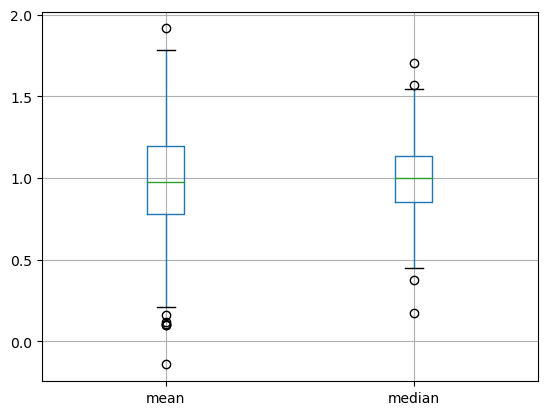

In [23]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [24]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,0.762658,NaN,NaN,1
1,2.026170,NaN,NaN,1
2,-0.001165,NaN,0.056805,0
3,1.170955,NaN,0.201145,0
4,-0.463453,-0.208990,0.126049,0
5,0.518409,0.951995,0.363427,0
6,1.453185,-0.262438,0.233580,0


Замена значений

In [25]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [26]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [27]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [28]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [30]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [32]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [33]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
5,False,False,False,False,True,False
6,False,False,False,False,False,True
7,False,True,False,False,False,False
8,False,False,True,False,False,False
9,False,False,False,True,False,False


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [37]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<Axes: title={'center': '0'}>]], dtype=object)

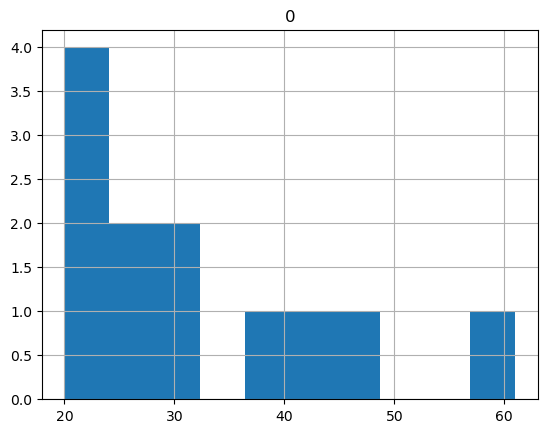

In [38]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [39]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [40]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [42]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\mari2\AppData\Local\Temp\ipykernel_2952\1753499592.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist= False, kde= True)


<Axes: ylabel='Density'>

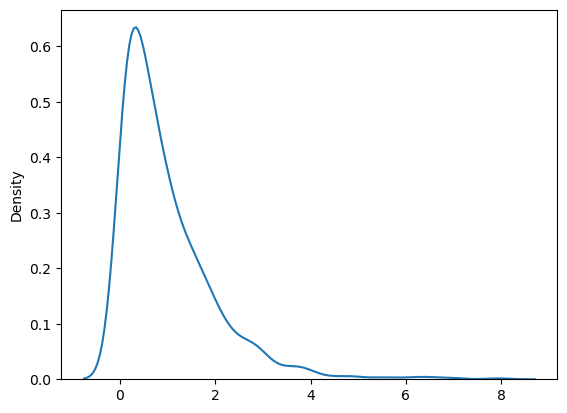

In [43]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\mari2\AppData\Local\Temp\ipykernel_2952\1776627611.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<Axes: ylabel='Density'>

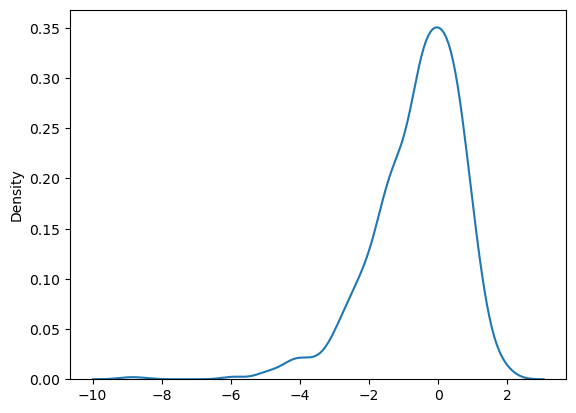

In [44]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\mari2\AppData\Local\Temp\ipykernel_2952\2198520673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False , kde=True)


<Axes: ylabel='Density'>

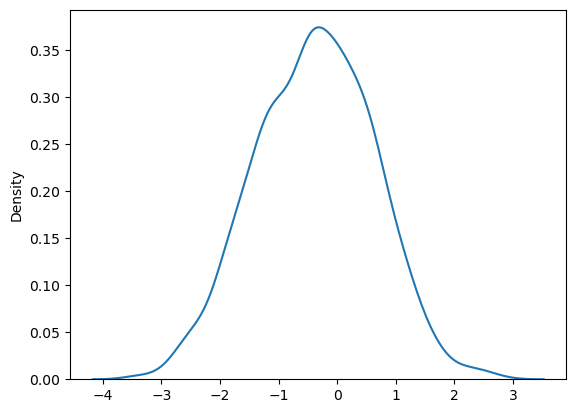

In [45]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [46]:
best_lambda

0.2664351136155293

# Домашнее задание

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [48]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

## Baseline

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [50]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
reg = LinearRegression().fit(train_X, train_y)

In [52]:
reg.score(train_X, train_y)

0.4555406785040049

In [53]:
mean_squared_error(reg.predict(train_X), train_y)

29840.121250865293

In [54]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [55]:
scores

{'fit_time': array([0.0445497 , 0.03352857, 0.04100132]),
 'score_time': array([0.00800085, 0.0079999 , 0.01199794]),
 'test_score': array([-29836.8590711 , -29618.75539266, -30344.6536926 ])}

In [56]:
mean_squared_error(reg.predict(test_X), test_y)

31021.024399854425

In [57]:
df.isna().count()

index                             43245
back-suspension                   43245
battery-capacity                  43245
charge-time                       43245
compression                       43245
consumption-mixed                 43245
cylinders-order                   43245
cylinders-value                   43245
engine-feeding                    43245
engine-start                      43245
engine-stop                       43245
engine-type                       43245
gear-type                         43245
luxury                            43245
max-speed                         43245
power-electro-kw                  43245
supply-system                     43245
valves                            43245
valvetrain                        43245
weight                            43245
configurations_auto-premiere      43245
configurations_back-wheel-base    43245
configurations_front-brake        43245
configurations_safety-rating      43245
configurations_seats              43245


In [61]:
class RidgeReg():
  
  def __init__(self, alpha = 1.0):
 
    self.alpha = alpha
    self.thetas = None
 
  def fit(self, x, y):
 
    x = x.copy()
    x = self.add_ones(x)
    I = np.identity(x.shape[1])
    I[0][0] = 0
 
    self.thetas = np.linalg.inv(x.T.dot(x) + self.alpha * I).dot(x.T).dot(y)
 
  def predict(self, x):
 
    x = x.copy()
    x = self.add_ones(x)
    return np.dot(x, self.thetas)
 
  def add_ones(self, x):
    return np.c_[np.ones((len(x), 1)), x]

In [66]:
ridge = RidgeReg(alpha=10)

ridge.fit(train_X, train_y)

y_pred_train = ridge.predict(train_X)
y_pred_test = ridge.predict(test_X)

print('train: ' + str(mean_squared_error(train_y, y_pred_train, squared=False)))
print('test: ' + str(mean_squared_error(test_y, y_pred_test, squared=False)))

train: 172.7482953685965
test: 176.14170204982946


In [73]:
class ElasticNet():
  def __init__(self, a1 = 0.1, a2 = 0.1):
    self.thetas = None
    self.loss_history = []
    self.a1 = a1
    self.a2 = a2
 
  def add_ones(self, x):
    return np.c_[np.ones((len(x), 1)), x]
 
  def objective(self, x, y, thetas, n):
    return (np.sum((y - self.h(x, thetas)) ** 2) + self.a1 * np.sum(np.abs(thetas)) + self.a2 * np.dot(thetas, thetas)) / (2 * n)
 
  def h(self, x, thetas):
    return np.dot(x, thetas)
 
  def gradient(self, x, y, thetas, n):
    return (np.dot(-x.T, (y - self.h(x, thetas))) + (self.a1 * np.sign(thetas)) + (self.a2 * thetas)) / n
 
  def fit(self, x, y, iter = 20000, learning_rate = 0.05):
    x, y = x.copy(), y.copy()
    x = self.add_ones(x)
 
    thetas, n = np.zeros(x.shape[1]), x.shape[0]
 
    loss_history = []
 
    for i in range(iter):
      loss_history.append(self.objective(x, y, thetas, n))
      grad = self.gradient(x, y, thetas, n)
      thetas -= learning_rate * grad
 
    self.thetas = thetas
    self.loss_history = loss_history
 
  def predict(self, x):
    x = x.copy()
    x = self.add_ones(x)
    return np.dot(x, self.thetas)

In [75]:
from sklearn.linear_model import ElasticNet
 
elastic = ElasticNet(alpha = 0.05)
elastic.fit(train_X, train_y)
 
elastic.fit(train_X, train_y)
 
y_pred_train = elastic.predict(train_X)
y_pred_test = elastic.predict(test_X)
 
print('train: ' + str(mean_squared_error(train_y, y_pred_train, squared = False)))
print('test: ' + str(mean_squared_error(test_y, y_pred_test, squared = False)))

C:\Users\mari2\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.441e+07, tolerance: 1.588e+05
  model = cd_fast.enet_coordinate_descent(


train: 172.96537854655432
test: 176.44406201020084


C:\Users\mari2\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.441e+07, tolerance: 1.588e+05
  model = cd_fast.enet_coordinate_descent(
